# PyPSA Übung 1

### Dynamischer Stromtarif mit Heimspeicher

Da seit 2025 dynamische Stromtarife verpflichtend angeboten werden müssen, überlegen Sie ihren Tarif zu einen solchen zu wechseln. Um Ihren Verbrauch zu flexibilisieren wollen Sie sich einen Lithium-Ionen-Heimspeicher zulegen. Ihnen liegen die Strompreise für 2024 stündlich aufgeschlüsselt, sowie der Stromverbrauch ihres Eigenheims vor. Bestimmen Sie die ökonomisch optimale Größe des Heimspeichers.

Die Kosten für den Heimspeicher können mit 750 €/kWh angenommen werden. Die Lebenszeit beträgt 20 Jahre, der Zinssatz kann mit 2% angenommen werden. Die _round trip_ Effizienz beträgt 95%. Standverluste können vernachlässigt werden.

Modellskizze:


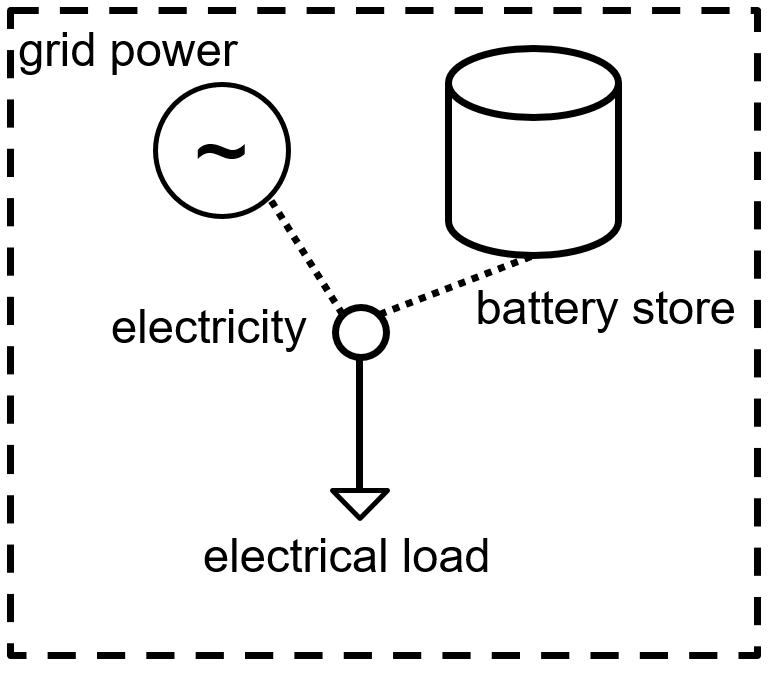

Importieren Sie zunächst die notwendigen Bibliotheken

In [2]:
import pypsa
import pandas as pd
import numpy as np

C:\Users\sarah\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\sarah\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\sarah\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


Lesen Sie die Strompreise sowie Netzlast ein ('PyPSA_1.csv')

In [8]:
df_data = pd.read_csv('Input/data_PyPSA_01.csv', sep=',', decimal='.')
df_strompreis = df_data["Strompreis [Euro/kWh]"]
df_last = df_data["Netzlast [kW]"]

In [9]:
df_last

0       0.382568
1       0.334995
2       0.282466
3       0.282466
4       0.271564
          ...   
8779    0.615775
8780    0.677061
8781    0.889129
8782    0.777258
8783    0.456238
Name: Netzlast [kW], Length: 8784, dtype: float64

In [10]:
df_strompreis

0       0.212903
1       0.212796
2       0.212784
3       0.212772
4       0.212748
          ...   
8779    0.293430
8780    0.255100
8781    0.231467
8782    0.223565
8783    0.213403
Name: Strompreis [Euro/kWh], Length: 8784, dtype: float64

Berechnen Sie die Stromkosten ohne Heimspeicher

In [ ]:
ref_kosten = sum(df_strompreis * df_last)

Bauen Sie ein Modell auf, welches die Problemstellung abbildet

In [11]:
zinssatz = 0.02 # Zinsen in pu
lebensdauer_batterie = 20 # Jahre
roundtrip_eff_batterie = 0.95 # Wikrungsgrad in pu
invest_kosten_batterie = 750 #in Euro 
annuitaet_batterie = invest_kosten_batterie*((1+zinssatz)**lebensdauer_batterie)*zinssatz/((1+zinssatz)**lebensdauer_batterie-1)

# PyPSA Modell
network = pypsa.Network()
network.set_snapshots(range(8784)) #Schaltjahr
#Bus
network.add('Bus', name = 'electricity')
#Load
network.add('Load', name = 'electrical_load', bus = 'electricity', p_set = df_last)
# Generator
network.add('Generator', name = 'grid_power', bus = 'electricity', 
            marginal_cost = df_strompreis, p_nom = np.inf)
#Speicher
network.add('StorageUnit', name = 'battery_store', bus = 'electricity', max_hours = 1,
            p_nom_extendable = True, capital_cost = annuitaet_batterie, 
            efficiency_store = roundtrip_eff_batterie**0.5, 
            efficiency_dispatch = roundtrip_eff_batterie**0.5)



Index(['battery_store'], dtype='object')

Lösen Sie das Modell

In [12]:
network.optimize(solver_name = 'gurobi')

Index(['electricity'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 5/5 [00:00<00:00, 63.23it/s]
INFO:linopy.io: Writing time: 0.53s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2694931


INFO:gurobipy:Set parameter LicenseID to value 2694931


Academic license - for non-commercial use only - expires 2026-08-11


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-11


Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-fbvp8ami.lp


INFO:gurobipy:Read LP format model from file C:\Users\sarah\AppData\Local\Temp\linopy-problem-fbvp8ami.lp


Reading time = 0.12 seconds


INFO:gurobipy:Reading time = 0.12 seconds


obj: 79057 rows, 35137 columns, 149328 nonzeros


INFO:gurobipy:obj: 79057 rows, 35137 columns, 149328 nonzeros


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 7 5800X3D 8-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 8 physical cores, 16 logical processors, using up to 16 threads


INFO:gurobipy:Thread count: 8 physical cores, 16 logical processors, using up to 16 threads


INFO:gurobipy:


Optimize a model with 79057 rows, 35137 columns and 149328 nonzeros


INFO:gurobipy:Optimize a model with 79057 rows, 35137 columns and 149328 nonzeros


Model fingerprint: 0x48df73bf


INFO:gurobipy:Model fingerprint: 0x48df73bf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 1e+00]


INFO:gurobipy:  Matrix range     [1e+00, 1e+00]


  Objective range  [5e-02, 5e+01]


INFO:gurobipy:  Objective range  [5e-02, 5e+01]


  Bounds range     [0e+00, 0e+00]


INFO:gurobipy:  Bounds range     [0e+00, 0e+00]


  RHS range        [1e-01, 2e+00]


INFO:gurobipy:  RHS range        [1e-01, 2e+00]


Presolve removed 35140 rows and 2 columns


INFO:gurobipy:Presolve removed 35140 rows and 2 columns


Presolve time: 0.18s


INFO:gurobipy:Presolve time: 0.18s


Presolved: 17568 rows, 43917 columns, 122965 nonzeros


INFO:gurobipy:Presolved: 17568 rows, 43917 columns, 122965 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 4.392e+04


INFO:gurobipy: AA' NZ     : 4.392e+04


 Factor NZ  : 2.195e+05 (roughly 26 MB of memory)


INFO:gurobipy: Factor NZ  : 2.195e+05 (roughly 26 MB of memory)


 Factor Ops : 3.328e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.328e+06 (less than 1 second per iteration)


 Threads    : 6


INFO:gurobipy: Threads    : 6


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0  -7.69622894e+06  3.84969629e+07  6.89e+06 3.54e-01  1.81e+03     0s


INFO:gurobipy:   0  -7.69622894e+06  3.84969629e+07  6.89e+06 3.54e-01  1.81e+03     0s


   1  -3.52336888e+06  9.92430740e+06  1.42e+06 2.33e-15  3.24e+02     0s


INFO:gurobipy:   1  -3.52336888e+06  9.92430740e+06  1.42e+06 2.33e-15  3.24e+02     0s


   2  -1.01066140e+05  1.80078502e+05  1.20e+05 1.39e-15  1.96e+01     0s


INFO:gurobipy:   2  -1.01066140e+05  1.80078502e+05  1.20e+05 1.39e-15  1.96e+01     0s


   3   1.59937068e+02  3.51963161e+03  9.43e+02 2.66e-15  1.66e-01     0s


INFO:gurobipy:   3   1.59937068e+02  3.51963161e+03  9.43e+02 2.66e-15  1.66e-01     0s


   4   7.30512402e+02  2.66784242e+03  3.92e+02 1.78e-15  6.90e-02     0s


INFO:gurobipy:   4   7.30512402e+02  2.66784242e+03  3.92e+02 1.78e-15  6.90e-02     0s


   5   1.00810213e+03  2.24411593e+03  1.24e+02 2.08e-15  2.53e-02     0s


INFO:gurobipy:   5   1.00810213e+03  2.24411593e+03  1.24e+02 2.08e-15  2.53e-02     0s


   6   1.05105084e+03  1.94327366e+03  8.38e+01 1.56e-15  1.61e-02     0s


INFO:gurobipy:   6   1.05105084e+03  1.94327366e+03  8.38e+01 1.56e-15  1.61e-02     0s


   7   1.11579363e+03  1.73300783e+03  2.21e+01 1.87e-15  7.54e-03     0s


INFO:gurobipy:   7   1.11579363e+03  1.73300783e+03  2.21e+01 1.87e-15  7.54e-03     0s


   8   1.15794817e+03  1.52657238e+03  6.84e+00 1.63e-15  3.87e-03     0s


INFO:gurobipy:   8   1.15794817e+03  1.52657238e+03  6.84e+00 1.63e-15  3.87e-03     0s


   9   1.16857059e+03  1.46875690e+03  5.09e+00 1.54e-15  3.09e-03     0s


INFO:gurobipy:   9   1.16857059e+03  1.46875690e+03  5.09e+00 1.54e-15  3.09e-03     0s


  10   1.17624541e+03  1.43789672e+03  4.08e+00 1.37e-15  2.66e-03     0s


INFO:gurobipy:  10   1.17624541e+03  1.43789672e+03  4.08e+00 1.37e-15  2.66e-03     0s


  11   1.18489431e+03  1.41274170e+03  3.23e+00 1.33e-15  2.29e-03     0s


INFO:gurobipy:  11   1.18489431e+03  1.41274170e+03  3.23e+00 1.33e-15  2.29e-03     0s


  12   1.18887159e+03  1.39394667e+03  2.87e+00 1.33e-15  2.05e-03     0s


INFO:gurobipy:  12   1.18887159e+03  1.39394667e+03  2.87e+00 1.33e-15  2.05e-03     0s


  13   1.19509234e+03  1.36308524e+03  2.29e+00 1.24e-15  1.67e-03     0s


INFO:gurobipy:  13   1.19509234e+03  1.36308524e+03  2.29e+00 1.24e-15  1.67e-03     0s


  14   1.19623100e+03  1.35276232e+03  2.21e+00 1.44e-15  1.55e-03     0s


INFO:gurobipy:  14   1.19623100e+03  1.35276232e+03  2.21e+00 1.44e-15  1.55e-03     0s


  15   1.20096953e+03  1.34713177e+03  1.84e+00 1.35e-15  1.44e-03     0s


INFO:gurobipy:  15   1.20096953e+03  1.34713177e+03  1.84e+00 1.35e-15  1.44e-03     0s


  16   1.20663696e+03  1.33475191e+03  1.43e+00 1.30e-15  1.25e-03     0s


INFO:gurobipy:  16   1.20663696e+03  1.33475191e+03  1.43e+00 1.30e-15  1.25e-03     0s


  17   1.20979805e+03  1.31901698e+03  1.26e+00 1.14e-15  1.07e-03     0s


INFO:gurobipy:  17   1.20979805e+03  1.31901698e+03  1.26e+00 1.14e-15  1.07e-03     0s


  18   1.21747725e+03  1.30506940e+03  8.64e-01 9.76e-16  8.50e-04     0s


INFO:gurobipy:  18   1.21747725e+03  1.30506940e+03  8.64e-01 9.76e-16  8.50e-04     0s


INFO:gurobipy:


Barrier performed 18 iterations in 0.50 seconds (0.47 work units)


INFO:gurobipy:Barrier performed 18 iterations in 0.50 seconds (0.47 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with primal simplex


INFO:gurobipy:Solved with primal simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   13699    1.2401237e+03   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:   13699    1.2401237e+03   0.000000e+00   0.000000e+00      1s


INFO:gurobipy:


Solved in 13699 iterations and 0.56 seconds (0.64 work units)


INFO:gurobipy:Solved in 13699 iterations and 0.56 seconds (0.64 work units)


Optimal objective  1.240123687e+03


INFO:gurobipy:Optimal objective  1.240123687e+03
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 35137 primals, 79057 duals
Objective: 1.24e+03
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

Geben Sie sich die größe des Batteriespeichers, dessen Gesamtkosten und die Gesamtkosten (Zielfunktion) aus

In [13]:
(network.generators_t.p * network.generators_t.marginal_cost).sum()


Generator
grid_power    1212.925564
dtype: float64

In [23]:
network.statistics()

,,Optimal Capacity,Installed Capacity,Supply,Withdrawal,Energy Balance,Transmission,Capacity Factor,Curtailment,Capital Expenditure,Operational Expenditure,Revenue,Market Value
Generator,-,inf,inf,4033.08026,0.00000,4033.08026,0.0,0.000000,inf,0.00000,1212.92556,1212.92556,0.300736
Load,-,0.00000,0.0,0.00000,4014.08598,-4014.08598,0.0,NaN,0.00000,0.00000,0.00000,-1240.12369,NaN
StorageUnit,-,0.59297,0.0,360.89142,379.88571,-18.99429,0.0,0.142216,5227.65205,27.19812,0.00000,27.19812,0.075444
